# Support Vector Cassification for multi class classification

* As we know SVC cannot do multiclass classification
* But we have two options OVO and OVR options through which we can perform  multi class classification in SVC



# lets import neccesary libraries

In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,log_loss,confusion_matrix,classification_report
from  sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC,SVC,NuSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Lets Download the cancer data from kaggle

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!mkdir cancerdata
!kaggle datasets download -d rishidamarla/cancer-patients-data
!unzip cancer-patients-data.zip -d cancerdata

Saving kaggle.json to kaggle.json
  0% 0.00/68.6k [00:00<?, ?B/s]
100% 68.6k/68.6k [00:00<00:00, 40.0MB/s]
Archive:  cancer-patients-data.zip
  inflating: cancerdata/cancer patient data sets.xlsx  


# Lets load the dataset

In [62]:
cancerdata = pd.read_excel('/content/cancerdata/cancer patient data sets.xlsx')
cancerdata.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [63]:
cancerdata.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [64]:
#for column in list(cancerdata.columns):
#  print('********* '+str(column) + " **********")
#  print(cancerdata[column].value_counts())
# As all features are ordinal we can keep then as it is

In [65]:
# null value check
cancerdata.isnull().sum()
# No null values

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [66]:
# data balance check
cancerdata.Level.value_counts()
# data almost balanced so no issue

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [67]:
cancerdata.iloc[:,1:-1].corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = pd.DataFrame(cancerdata.iloc[:,1:-1]).columns
vif["vif_Factor"] = [variance_inflation_factor(cancerdata.iloc[:,1:-1].values, i) for i in range(cancerdata.iloc[:,1:-1].shape[1])]
vif

,features,vif_Factor
0,Age,8.878553
1,Gender,7.229196
2,Air Pollution,18.730416
3,Alcohol use,53.488354
4,Dust Allergy,50.521043
5,OccuPational Hazards,124.714056
6,Genetic Risk,112.607021
7,chronic Lung Disease,58.049623
8,Balanced Diet,38.343194
9,Obesity,42.431869


In [69]:
X = cancerdata.iloc[:,1:-1]
y = cancerdata.iloc[:,[-1]]
y.Level = y.Level.map({'Low':0,"Medium":1,"High":2})

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 23)
(200, 23)
(800, 1)
(200, 1)


In [71]:
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_test)

Lets create result table

In [72]:
result_data = pd.DataFrame(data = np.zeros((2,6)),index = ['accuracy','f1_score'],columns= ['Linear_SVC_Crammer_Stinger', 'Linear_SVC_OVR','Kernal_SVC_OVO','Kernal_SVC_OVR','Nu_SVC_OVO','Nu_SVC_OVR'])
result_data

,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,0.0,0.0,0.0,0.0,0.0,0.0
f1_score,0.0,0.0,0.0,0.0,0.0,0.0


# Lets apply SVC in Crammer_Stinger setting

In [73]:
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=5),'loss' : ['hinge','squared_hinge']}
model = GridSearchCV(LinearSVC(multi_class = 'crammer_singer'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

LinearSVC(C=1.9859859348413664, loss='hinge', multi_class='crammer_singer')
1.0


In [74]:
def result_check (type, y_true,y_pred):
  result_data[type]['accuracy'] = accuracy_score(y_true, y_pred)
  result_data[type]['f1_score'] = f1_score(y_true, y_pred, average = 'weighted')
  print("accuracy score : " , accuracy_score(y_test, y_pred))
  print("f1_Score : " ,f1_score(y_true, y_pred, average = 'weighted'))
  print('*'*30)
  print('    Confusion Matrix         ')
  print('*'*30)
  sns.heatmap(confusion_matrix(y_test, y_pred),annot = True, cmap = 'YlGnBu')
  plt.show()
  print('*'*30)
  print('     Classification report         ')
  print('*'*30)
  print(classification_report (y_test, y_pred))
  return result_data

accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


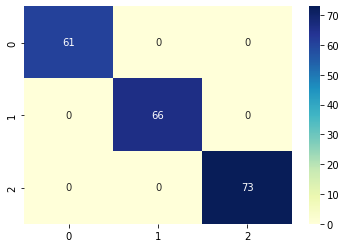

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,0.0,0.0,0.0,0.0,0.0
f1_score,1.0,0.0,0.0,0.0,0.0,0.0


In [75]:
y_pred = model.predict(X_test)
result_check ('Linear_SVC_Crammer_Stinger', y_test,y_pred)

# Lets apply LInear SVC in OVR setting

In [76]:
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=5),'loss' : ['hinge','squared_hinge']}
model = GridSearchCV(LinearSVC(multi_class = 'ovr'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

LinearSVC(C=2.922060971073426)
0.9950000000000001


accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


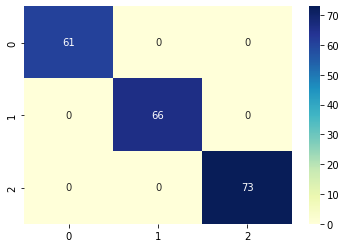

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,1.0,0.0,0.0,0.0,0.0
f1_score,1.0,1.0,0.0,0.0,0.0,0.0


In [77]:
y_pred = model.predict(X_test)
result_check ('Linear_SVC_OVR', y_test,y_pred)

# Lets apply SVC in OVO setting

In [78]:
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=5),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 'degree' : range(1,5)}
model = GridSearchCV(SVC(decision_function_shape = 'ovo'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

SVC(C=2.2743249943311716, decision_function_shape='ovo', degree=1,
    kernel='linear')
1.0


accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


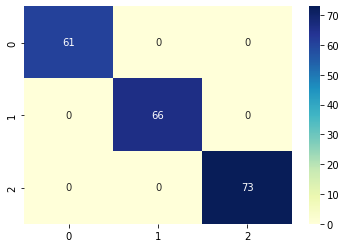

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,1.0,1.0,0.0,0.0,0.0
f1_score,1.0,1.0,1.0,0.0,0.0,0.0


In [79]:
y_pred = model.predict(X_test)
result_check ('Kernal_SVC_OVO', y_test,y_pred)

# Lets apply SVC in OVR setting

In [80]:
parameters = {'C': np.random.uniform(low=0.0, high=3.0, size=5),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 'degree' : range(1,5)}
model = GridSearchCV(SVC(decision_function_shape = 'ovr'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

SVC(C=1.3577055358375587, degree=1, kernel='linear')
1.0


accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


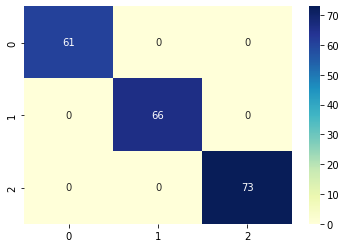

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,1.0,1.0,1.0,0.0,0.0
f1_score,1.0,1.0,1.0,1.0,0.0,0.0


In [81]:
y_pred = model.predict(X_test)
result_check ('Kernal_SVC_OVR', y_test,y_pred)

# Lets apply NuSVC in OVO setting

In [82]:
parameters = {'nu': np.random.uniform(low=0.000001, high=1.0, size=10),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 'degree' : range(1,5)}
model = GridSearchCV(NuSVC(decision_function_shape = 'ovo'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

NuSVC(decision_function_shape='ovo', degree=1, kernel='linear',
      nu=0.059326751323535404)
1.0


accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


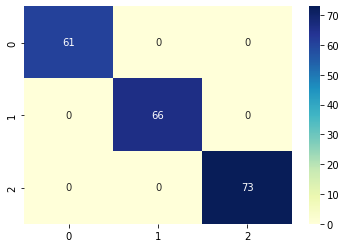

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,1.0,1.0,1.0,1.0,0.0
f1_score,1.0,1.0,1.0,1.0,1.0,0.0


In [83]:
y_pred = model.predict(X_test)
result_check ('Nu_SVC_OVO', y_test,y_pred)

# Lets apply NuSVC in OVR setting

In [84]:
parameters = {'nu': np.random.uniform(low=0.000001, high=1.0, size=10),'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 'degree' : range(1,5)}
model = GridSearchCV(NuSVC(decision_function_shape = 'ovr'), parameters,refit = True, scoring = 'accuracy',return_train_score = True)
model.fit(X_train,y_train)
#print(model.cv_results_)
print(model.best_estimator_)
print(model.best_score_)

NuSVC(degree=1, kernel='linear', nu=0.08320561780168133)
1.0


accuracy score :  1.0
f1_Score :  1.0
******************************
    Confusion Matrix         
******************************


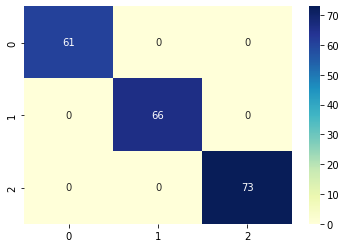

******************************
     Classification report         
******************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        73

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



,Linear_SVC_Crammer_Stinger,Linear_SVC_OVR,Kernal_SVC_OVO,Kernal_SVC_OVR,Nu_SVC_OVO,Nu_SVC_OVR
accuracy,1.0,1.0,1.0,1.0,1.0,1.0
f1_score,1.0,1.0,1.0,1.0,1.0,1.0


In [85]:
y_pred = model.predict(X_test)
result_check ('Nu_SVC_OVR', y_test,y_pred)